# Classification Ruben Serdons

In [1]:
#Project 1, Ruben Serdons, Ad Click dataset

## Imports

In [2]:
# !pip install ydata_profiling
# !pip install sweetviz
# !pip install phik

import pandas as pd
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv
from phik import resources
from phik.report import plot_correlation_matrix

from google.colab import drive
drive.mount('/content/drive', force_remount=False)

%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load data + drops

In [3]:
# df = pd.read_csv('Data/ad_click_dataset.csv')
df = pd.read_csv('/content/drive/MyDrive/Data/ad_click_dataset.csv')

In [4]:
df.drop(['full_name'], axis=1, inplace=True)
df.drop(['id'], axis=1, inplace=True)

## Exploring data

In [5]:
df.columns

Index(['age', 'gender', 'device_type', 'ad_position', 'browsing_history',
       'time_of_day', 'click'],
      dtype='object')

In [6]:
df.shape

(10000, 7)

## Target variable distribution, is it optimal?

<Axes: xlabel='click', ylabel='Count'>

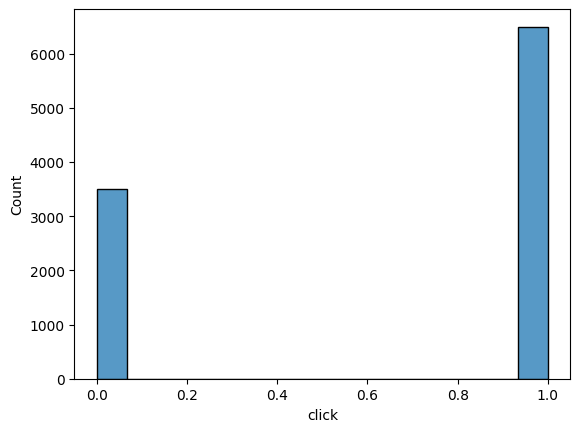

In [7]:
sns.histplot(df['click'])

Since we are working with a categorical variable which is a binary variable, we won't look at the distribution but at the balance. We see here that we have some significant inbalance. Since the dataset is pretty big, it will still be workable. We will have to look at techniques like **synthetic data generation** or **sampling** to work around this.

## Independent variable distributions, are they balanced throughout the datasets?

In [8]:
# We will use YData Profiling to generate a report

report = ProfileReport(df, title='Ad Click data For Advanced Data Analytics')

report.to_notebook_iframe()

report.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### General:
The dataset contains 7 variables and 10000 observations, with a significant proportion of missing data, approximately 28.9% across the dataset (20,241 missing cells). This could lead to imbalance in the variable distributions, particularly in the categorical features. Also the dataset has 1758 duplicate rows (17.6%), which could affect model performance and data integrity.

Of the variables, 6 are categorical and 1 is numeric. The presence of a single numeric variable suggests that most of the dataset's balance concerns will focus on the categorical distributions. The relatively high proportion of missing and duplicate data indicates that careful cleaning and preprocessing will be necessary to achieve balanced, reliable distributions across variables.

#### Age
The age variable is a number with a significant amount of missing data, accounting for 47.7% of the values. It has a mean value of 40.2, with the minimum and maximum ages being 18 and 64, respectively, indicating a broad age range. The data is not skewed by zero or negative values and there are no infinite values. However, the high percentage of missing data (almost half the dataset) suggests that this variable may be imbalanced, as almost 50% of entries are incomplete, which could affect any analysis or model using this feature.

#### Gender:
The gender variable is categorical with three distinct categories: Female, Male, and Non-Binary. While the dataset shows an almost balanced distribution across the three categories, with 1834 Females, 1810 Males, and 1663 Non-Binary individuals, therre is a significant amount of missing data. Approximately 46.9% of the entries (4693 records) are missing, which may cause bias or imbalance in the dataset and effect the analysis.

#### Device_type:
The variable device_type is a categorical feature with three distinct categories: Desktop, Mobile, and Tablet. The distribution across these categories appears fairly balanced, with Desktop (2754), Mobile (2649), and Tablet (2597) having similar counts. However, 20% of the data (2000 entries) are missing, which could introduce some bias or imbalance in the analysis if not handled appropriately. Since the percentage of distinct categories is very low (<0.1%), the majority of the dataset falls into these tree categories.

#### Ad_position:
The variable ad_position is a categorical feature with 3 distinct categories, but it has a significant amount of missing data, 20% of its values are missing (2000 entries). This could potentially impact model performance if these missing values are not addressed. The distinct categories are 'Bottom' (2817 occurrences), 'Top' (2597 occurrences), and 'Side' (2586 occurrences), with each category being fairly evenly distributed. Despite the missing data, the balance between the existing categories appears strong, as no category is overwhelmingly dominant. However, addressing the missing data is important to maintain the dataset's integrity.

#### Browsing_history:
The variable browsing_history is a categorical feature with 5 distinct categories: Entertainment, Social Media, Education, Shopping, and News. While the distribution of categories appears fairely balanced, with values ranging from 976 to 1175 occurrences, nearly 47.8% of the data is missing. This large percentage of missing values could affect the overall analysis and model performance if not handled properly. The memory size is 78.2 KiB, and the distinct value count is low, at 0.1%, indicating a limited variety in the categorical data.

#### Time_of_day:
The catgeorical variable "time_of_day" consists of four distinct categories: Morning, Afternoon, Evening, and Night. It has 2,000 missing values, accounting for 20% of the dataset, which could impact analysis and model performance. The distribution of non-missing values is relatively balanced, with Morning (2,126), Afternoon (2,016), Evening (1,958), and Night (1,900) representing approximately 19% to 21% of the non-missing observations. However, the significant missing data may require imputation or further investigation to avoid bias in the analysis.

## Overlapping data and noise, are any variables messy (lots of outliers etc.) or do they have contradicting trends, that might be non-optimal or confusing for the target -variable?

### Outliers (**YData-profiling**):
From looking at the **YData** profile we conclude that we don't really see outliers.

### Overlapping (**YData-profiling**):
- When looking at the histograms of the different variables, we don't really see multiple peaks per plot.
- When looking at the correlation matrix, normally high (close to -1 or 1) correlations can mean overlap or redundancy. We don't see any high correlations here. So no clue for overlapping.

## Redundancy, are there any variables that probably could be removed due to redundant information?

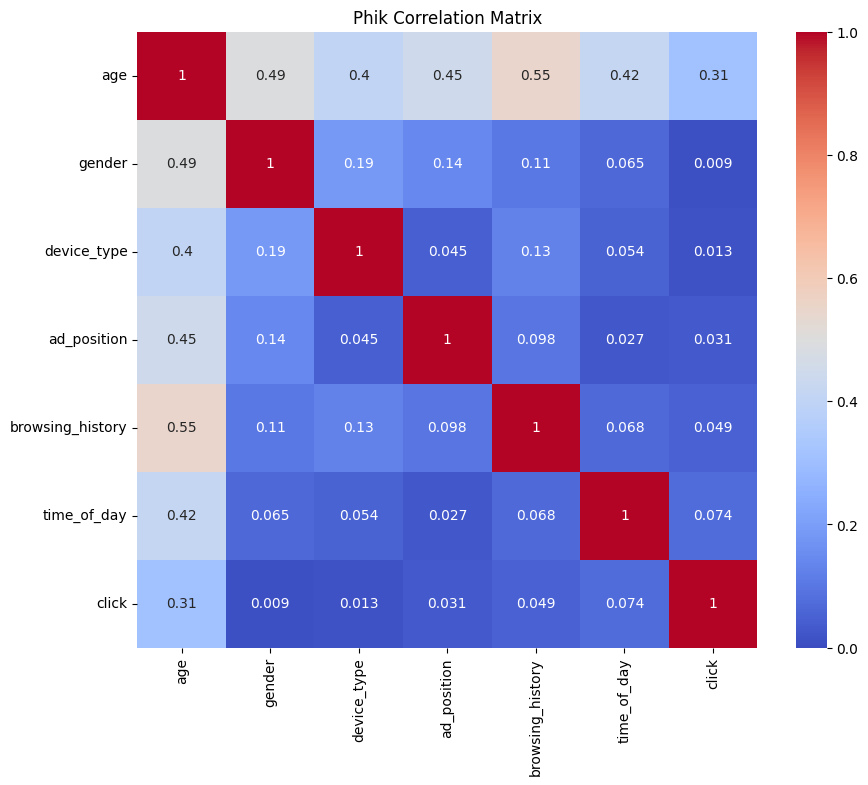

In [9]:
phik_matrix = df.phik_matrix(interval_cols=[])

plt.figure(figsize=(10,8))
sns.heatmap(phik_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Phik Correlation Matrix')

plt.show()

### Reduncancy:
This Phik plot tells us the folowing:
- "*High*" correlation between Hrowsing History and Age might tell us that there is a possible trend where certain age groups have similar browsing behaviour. Depending on the specific use case, one of these variables could be considered redundant, but more analysis is needed.


## Other problems in the dataset, like missing data and duplicate rows?


For this we will use Sweetviz

In [10]:
report = sv.analyze(df)
report.show_html('sv_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sv_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


When opening the Sweetviz html report, we immediately see some significant percentages of missing values in certain variables:
- gender: 47%
- device type: 19%
- ad position: 20%
- browsing history: 47%
- time of day: 20%

Possible solutions:
- variables with high NA percentages: cinsider dropping or use synthetic data imputation
- with lower missing percentages: consider using mean/median imputation

Dupicate rows:

In [11]:
duplicates = df.duplicated()

num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 4589


We see that we have a lot of dupicated rows also. Before we just drop them, it might be usefull to understand as for why they exist. If after that you conclude that they don't add any valuable information to the dataset, we could drop them.

## Let us see what Autoviz has for us

In [12]:
!pip install autoviz

In [13]:
from autoviz.AutoViz_Class import AutoViz_Class

av = AutoViz_Class()

av.AutoViz(pd.read_csv('/content/drive/MyDrive/Data/ad_click_dataset.csv'))

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (10000, 9)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  5
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  1
    Number of

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
id,int64,0.000000,55,5.000000,10000.000000,No issue
full_name,object,0.000000,55,,,No issue
age,float64,48.635791,NA,18.000000,64.000000,"3476 missing values. Impute them with mean, median, mode, or a constant value such as 123."
gender,object,47.572408,0,,,"3400 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: float, object,"
device_type,object,24.177977,0,,,"1728 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
ad_position,object,24.387855,0,,,"1743 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
browsing_history,object,48.691759,0,,,"3480 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
time_of_day,object,23.954107,0,,,"1712 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
click,int64,0.000000,0,0.000000,1.000000,No issue


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

All Plots done
Time to run AutoViz = 22 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0
...,...,...,...,...,...,...,...,...,...
9995,8510,User8510,NaN,NaN,Mobile,Top,Education,NaN,0
9996,7843,User7843,NaN,Female,Desktop,Bottom,Entertainment,NaN,0
9997,3914,User3914,NaN,Male,Mobile,Side,NaN,Morning,0
9998,7924,User7924,NaN,NaN,Desktop,NaN,Shopping,Morning,1


Also Autoviz shows us that the missing values can be significant. It even tells us what our possible options with them are:
- imputing
- ...